In [46]:
# Setup
import pandas as pd
import matplotlib.pyplot as plt

# Apartment Prices

In [2]:
# import data
apartment_df = pd.read_csv("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/Booli_sold.csv")

In [3]:
apartment_df.head()

,listPrice,rent,livingArea,rooms,published,constructionYear,objectType,booliId,soldDate,soldPrice,...,location.position.latitude,location.position.longitude,location.position.isApproximate,location.region.municipalityName,location.region.countyName,location.distance.ocean,source.name,source.id,source.type,source.url
0,3995000,4467.0,73.0,3.0,2018-10-15 13:33:18,1935.0,Lägenhet,3263989,2018-11-08,3820000,...,59.371033,18.054057,NaN,Stockholm,Stockholms län,260,MOHV,1901865,Broker,http://www.mohv.se/
1,1995000,1773.0,36.0,1.0,2018-10-05 14:29:28,1968.0,Lägenhet,3256231,2018-10-19,2355000,...,59.371242,18.057821,NaN,Stockholm,Stockholms län,218,Notar,1566,Broker,http://www.notar.se/
2,5100000,3839.0,81.0,3.0,2018-09-11 13:44:43,1936.0,Lägenhet,3236660,2018-09-27,6110000,...,59.371617,18.054716,NaN,Stockholm,Stockholms län,186,Historiska Hem AB,65645750,Broker,http://historiskahem.se/
3,5495000,4483.0,107.0,4.0,2018-08-25 02:56:56,1936.0,Lägenhet,3224374,2018-09-06,8050000,...,59.371480,18.053880,NaN,Stockholm,Stockholms län,218,Notar,1566,Broker,http://www.notar.se/
4,1995000,1696.0,29.0,1.0,2018-06-15 17:16:19,1936.0,Lägenhet,3185496,2018-06-18,2400000,...,59.372160,18.053542,True,Stockholm,Stockholms län,166,Mäklarhuset,204,Broker,http://www.maklarhuset.se/


In [4]:
apartment_df["ppsqm"] = (apartment_df["soldPrice"] / apartment_df["livingArea"])
apartment_df[["listPrice","livingArea","ppsqm"]] \
        .sort_values("ppsqm", ascending = False).head()

,listPrice,livingArea,ppsqm
67,1595000,24.0,104166.666667
50,1890000,24.0,102083.333333
54,1795000,23.0,100000.000000
34,1750000,25.0,88400.000000
55,1895000,26.9,85501.858736


In [5]:
apartment_df["ppsqm"].mean()

58759.382760081724

<Axes: xlabel='location.distance.ocean', ylabel='ppsqm'>

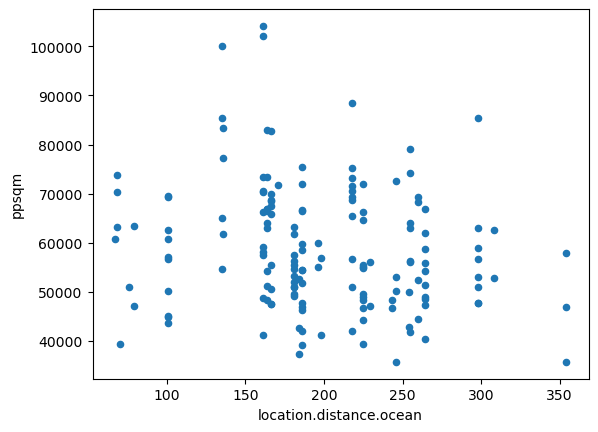

In [53]:
apartment_df.plot.scatter(x = "location.distance.ocean", y = "ppsqm")

# The Swedish Election of 2018

In [6]:
# import data
election_df = pd.read_csv("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/2018_R_per_kommun.csv", sep=";")
election_df.head()

,LÄNSKOD,KOMMUNKOD,LÄNSNAMN,KOMMUNNAMN,M,C,L,KD,S,V,...,TRP,VL-S,ÖVR,OGEJ,BLANK,OG,RÖSTER GILTIGA,RÖSTANDE,RÖSTBERÄTTIGADE,VALDELTAGANDE
0,1,14,Stockholms län,Upplands Väsby,"23,11","6,26","5,66","6,71","26,97","8,01",...,NaN,NaN,NaN,"0,04","0,69","0,06",25830,26036,30740,"84,7"
1,1,15,Stockholms län,Vallentuna,"28,29","10,11","7,73","7,58","18,91","4,47",...,0,NaN,0,"0,02","0,59","0,08",20952,21099,23438,"90,02"
2,1,17,Stockholms län,Österåker,"29,68","9,35","7,48","7,13","19,71","4,97",...,NaN,NaN,"0,01","0,03","0,69","0,13",27711,27947,31309,"89,26"
3,1,20,Stockholms län,Värmdö,"27,49","9,76","6,4","5,89","20,48","6,02",...,NaN,NaN,"0,01","0,04","0,67","0,07",28115,28335,31371,"90,32"
4,1,23,Stockholms län,Järfälla,"23,96","6,31","6,04","6,29","27,68","8,75",...,0,NaN,"0,02","0,04","0,53","0,07",45654,45948,53230,"86,32"


In [7]:
election_df["RÖSTER GILTIGA"].sum()

6476725

In [8]:
election_df[["LÄNSNAMN","KOMMUNNAMN","C"]].sort_values("C", ascending = False).head()

,LÄNSNAMN,KOMMUNNAMN,C
32,Uppsala län,Enköping,"9,99"
191,Värmlands län,Årjäng,"9,97"
233,Dalarnas län,Hedemora,"9,97"
248,Västernorrlands län,Härnösand,"9,94"
182,Västra Götalands län,Falköping,"9,92"


In [9]:
election_df[["LÄNSNAMN","KOMMUNNAMN","VALDELTAGANDE"]].sort_values("VALDELTAGANDE", ascending = False).head(3)

,LÄNSNAMN,KOMMUNNAMN,VALDELTAGANDE
103,Skåne län,Lomma,"93,86"
59,Jönköpings län,Habo,"93,35"
98,Skåne län,Vellinge,"93,13"


# Predicting Strokes

In [10]:
# import data
stroke_df = pd.read_csv("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/stroke-data.csv")
stroke_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [11]:
positive_df = stroke_df.loc[stroke_df["stroke"] == 1]



<Axes: xlabel='smoking_status'>

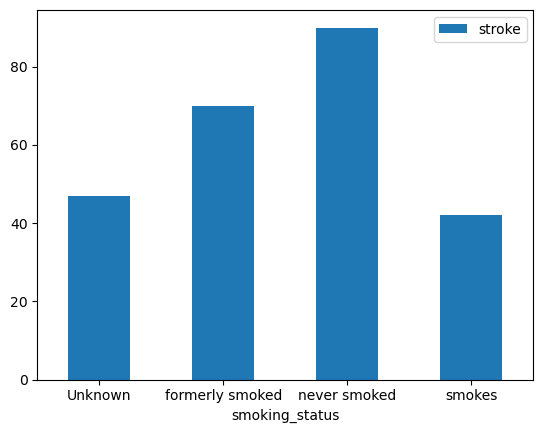

In [12]:
stroke_df.loc[stroke_df["stroke"] == 1] \
[["smoking_status","stroke"]]\
.groupby("smoking_status")\
.sum()\
.plot.bar(rot = 0)



<BarContainer object of 4 artists>

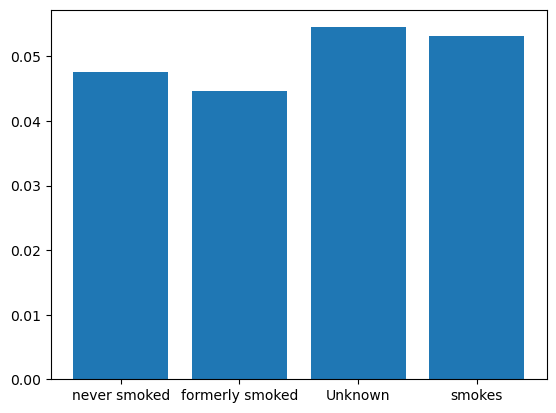

In [51]:
dada = stroke_df.value_counts(subset=["smoking_status","stroke"])

temp1 = dada.loc[(slice(None), [0])]
temp2 = dada.loc[(slice(None), [1])]


temp2.values/(temp1.values+temp2.values)

plt.bar(
    ["never smoked", "formerly smoked", "Unknown", "smokes"],
    temp2.values/(temp1.values+temp2.values)
)



smoking_status   stroke
never smoked     1         90
formerly smoked  1         70
Unknown          1         47
smokes           1         42
Name: count, dtype: int64